<a href="https://colab.research.google.com/github/Deri-Nugroho/Intensive-Camp-Machine-Learning-2/blob/main/LOGISTIC_REGRETION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 Logistic Regression

### Apa itu Logistic Regression?
Logistic Regression adalah algoritma supervised learning yang digunakan untuk klasifikasi, bukan regresi seperti namanya. Logistic Regression memprediksi probabilitas sebuah data masuk ke dalam kelas tertentu (biasanya dua kelas: 0 atau 1).

Contoh Kasus:
*   Memprediksi apakah email adalah spam atau bukan.
*   Memprediksi apakah pelanggan akan churn atau tidak.
*   Memprediksi apakah pasien memiliki penyakit tertentu (ya/tidak).

### Perbedaan Linear vs Logistic Regression
| Fitur           | Linear Regression            | Logistic Regression                          |
| --------------- | ---------------------------- | -------------------------------------------- |
| Output          | Nilai kontinu (misal: harga) | Probabilitas / klasifikasi (misal: 0 atau 1) |
| Fungsi Aktivasi | Tidak ada                    | Sigmoid                                      |
| Digunakan untuk | Prediksi nilai               | Prediksi kelas                               |


### Fungsi Sigmoid (Logistik)
Fungsi sigmoid mengubah output linear menjadi nilai antara 0 dan 1:

𝜎(𝑧)=1/1+𝑒−𝑧

Di mana:
*   z = w_1x_1 + w_2x_2 + ... + w_nx_n + b
*   σ(z) adalah probabilitas dari kelas 1



### Kelebihan & Kekurangan Logistic Regression
Kelebihan:


*   Mudah diinterpretasikan (koefisien menunjukkan pengaruh).
*   Cepat dan efisien untuk dataset kecil hingga menengah.
*   Output probabilitas (bisa digunakan untuk analisis risiko).

Kekurangan:

*   Tidak menangani hubungan non-linier dengan baik (kecuali ditambahkan fitur polinomial).
*   Kurang optimal untuk dataset besar dan kompleks.
*   Sensitif terhadap multikolinearitas.



# Contoh Program Python: Logistic Regression

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None 

           Gender         Age  EstimatedSalary   Purchased
count  400.000000  400.000000       400.000000  400.000000
mean     0.510000   37.655000     69742.500000    0.357500
std      0.500526   10.482

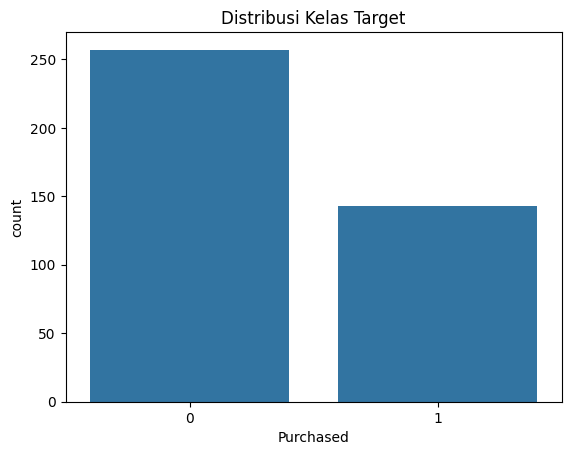

Akurasi Model: 0.81
ROC-AUC Score: 0.91


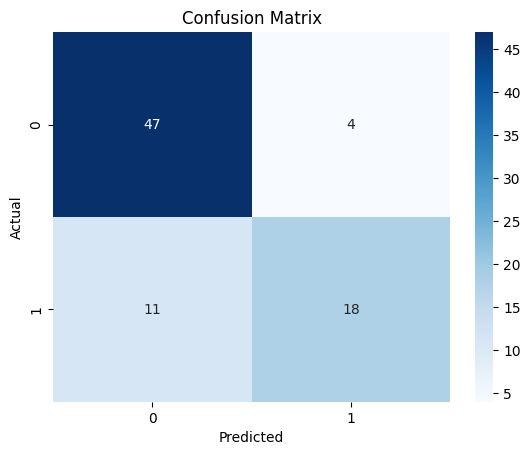

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86        51
           1       0.82      0.62      0.71        29

    accuracy                           0.81        80
   macro avg       0.81      0.77      0.78        80
weighted avg       0.81      0.81      0.81        80



In [ ]:
import os  # Modul untuk operasi file dan sistem
import pandas as pd  # Library untuk manipulasi data
import numpy as np  # Library untuk komputasi numerik
import seaborn as sns  # Library untuk visualisasi data
import matplotlib.pyplot as plt  # Library untuk membuat grafik
from sklearn.model_selection import train_test_split  # Untuk membagi dataset menjadi data latih dan uji
from sklearn.preprocessing import StandardScaler  # Untuk normalisasi fitur
from sklearn.linear_model import LogisticRegression  # Model regresi logistik
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score  # Metrik evaluasi model

# Mengecek apakah dataset sudah ada, jika tidak, download dari Kaggle
dataset_name = "Social_Network_Ads.csv"
if not os.path.exists(dataset_name):  # Cek apakah file ada di direktori
    print("Mengunduh dataset dari Kaggle...")
    os.system("kaggle datasets download -d dragonheir/logistic-regression")  # Download dataset dari Kaggle
    os.system("unzip logistic-regression.zip")  # Ekstrak file zip

# Membaca dataset ke dalam DataFrame
df = pd.read_csv("Social_Network_Ads.csv")
print(df.head(), "\n")  # Menampilkan 5 baris pertama dataset

# Menampilkan informasi dataset
print(df.info(), "\n")  # Menampilkan tipe data dan jumlah data

# Menghapus kolom yang tidak relevan
df.drop(columns=['User ID'], inplace=True)  # 'User ID' tidak berkontribusi pada prediksi

# Mengonversi kolom 'Gender' menjadi numerik
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})  # Ubah 'Male' = 0 dan 'Female' = 1

# Menampilkan statistik deskriptif
print(df.describe(), "\n")  # Menampilkan ringkasan statistik data

# Mengecek apakah ada nilai yang hilang dalam dataset
if df.isnull().sum().sum() > 0:
    print("Dataset mengandung nilai kosong, melakukan imputasi...")
    df.fillna(df.median(), inplace=True)  # Jika ada nilai kosong, isi dengan median

# Visualisasi distribusi kelas target
sns.countplot(x=df['Purchased'])  # Plot jumlah masing-masing kelas target
plt.title("Distribusi Kelas Target")
plt.show()

# Memisahkan fitur (X) dan label (y)
y = df['Purchased']  # Label (target)
X = df.drop(columns=['Purchased'])  # Fitur (independent variables)

# Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Normalisasi agar fitur memiliki skala yang sama

# Membagi dataset menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Inisialisasi model regresi logistik
model = LogisticRegression()

# Melatih model dengan data training
model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)  # Menghitung akurasi model
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])  # Menghitung ROC-AUC Score

# Menampilkan hasil evaluasi
print(f'Akurasi Model: {accuracy:.2f}')
print(f'ROC-AUC Score: {roc_auc:.2f}')

# Membuat Confusion Matrix untuk melihat performa prediksi
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')  # Visualisasi Confusion Matrix
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Menampilkan laporan klasifikasi
print("Classification Report:")
print(classification_report(y_test, y_pred))


In [ ]:
def predict_user():
    """Fungsi untuk memprediksi apakah pengguna akan membeli produk berdasarkan input usia, gender, dan gaji."""

    print("\n🔍 Prediksi Pembelian Berdasarkan Input Pengguna")

    # Meminta input dari user untuk gender, usia, dan gaji
    gender = input("Masukkan Gender (Male/Female): ").strip().capitalize()  # Menghapus spasi ekstra dan menyamakan format huruf
    age = int(input("Masukkan Usia: "))  # Mengonversi input usia menjadi integer
    salary = int(input("Masukkan Perkiraan Gaji: "))  # Mengonversi input gaji menjadi integer

    # Mengonversi Gender menjadi angka: 'Male' -> 0, 'Female' -> 1
    if gender == "Male":
        gender_num = 0
    elif gender == "Female":
        gender_num = 1
    else:
        print("⚠ Gender tidak valid! Harus 'Male' atau 'Female'.")  # Jika input tidak valid, tampilkan peringatan dan hentikan fungsi
        return

    # Membuat array input dengan format yang sesuai untuk model
    user_input = np.array([[gender_num, age, salary]])

    # Normalisasi input menggunakan StandardScaler agar sesuai dengan data yang dilatih
    user_input_scaled = scaler.transform(user_input)

    # Melakukan prediksi apakah user akan membeli produk (1) atau tidak (0)
    prediction = model.predict(user_input_scaled)

    # Menghitung probabilitas prediksi
    probability = model.predict_proba(user_input_scaled)[:, 1]

    # Menampilkan hasil prediksi kepada pengguna
    if prediction[0] == 1:
        print(f"\n✅ Hasil Prediksi: Kemungkinan BESAR membeli produk! ({probability[0]:.2f} kemungkinan)")
    else:
        print(f"\n❌ Hasil Prediksi: Kemungkinan TIDAK membeli produk. ({probability[0]:.2f} kemungkinan)")

# Memanggil fungsi prediksi
predict_user()



🔍 Prediksi Pembelian Berdasarkan Input Pengguna
Masukkan Gender (Male/Female): Female
Masukkan Usia: 17
Masukkan Perkiraan Gaji: 500

❌ Hasil Prediksi: Kemungkinan TIDAK membeli produk. (0.00 kemungkinan)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
